<a href="https://colab.research.google.com/github/rahatwads/Data-Science/blob/main/Assignment1_ShivaniRahatwad002734520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**ML Data Cleaning and Feature Selection**




MIT License

Copyright (c) 2024 rahatwads

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.



ASSIGNMENT 1:

About Dataset:
https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset

This data file includes all needed information to find out more about heart disease, necessary metrics to make predictions and draw conclusions.

We will be answering the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [6]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [3]:
!pip install kaggle


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d alphiree/cardiovascular-diseases-risk-prediction-dataset


100% 4.87M/4.87M [00:00<00:00, 41.2MB/s]
100% 4.87M/4.87M [00:00<00:00, 41.0MB/s]


In [9]:
!unzip cardiovascular-diseases-risk-prediction-dataset.zip


Archive:  cardiovascular-diseases-risk-prediction-dataset.zip
  inflating: CVD_cleaned.csv         


In [10]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=308ce6c7d18185a731b2b3db39592999390945cb0f334ece5afd8112789e218a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [11]:
!ls

cardiovascular-diseases-risk-prediction-dataset.zip  CVD_cleaned.csv  kaggle.json  sample_data


In [12]:
file_path = "/content/CVD_cleaned.csv"

In [13]:
df = pd.read_csv(file_path)

In [14]:
global df

Dataset:






In [15]:
df.head()

General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54             Yes                  0.0   
1        165.0        77.11  28.29              No                  0.0   
2        163.0        88.45  33.47              No                  4.0   
3        180.0        93.44  28.73              No                  0.0   
4        191.0        88.45  24.37             Yes                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [16]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

 **1. What are the data types? (Only numeric and categorical)**

In [17]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

The dataset has 12 Categorical and 7 Numerical Features.

 **2. Are there missing values?**

In [18]:
# to check missing values
missing_values = df.isnull().sum()
print(missing_values)

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


There are no missing values in this dataset.

 **3.Which independent variables have missing data? How much?**


From the above code we see that no independent variables have missing data

**4.What are the likely distributions of the numeric variables?**

In [19]:
#numeric distribution
numeric_summary = df.describe()
print(numeric_summary)

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

In [20]:
categorical_columns = df.select_dtypes(include='object').columns

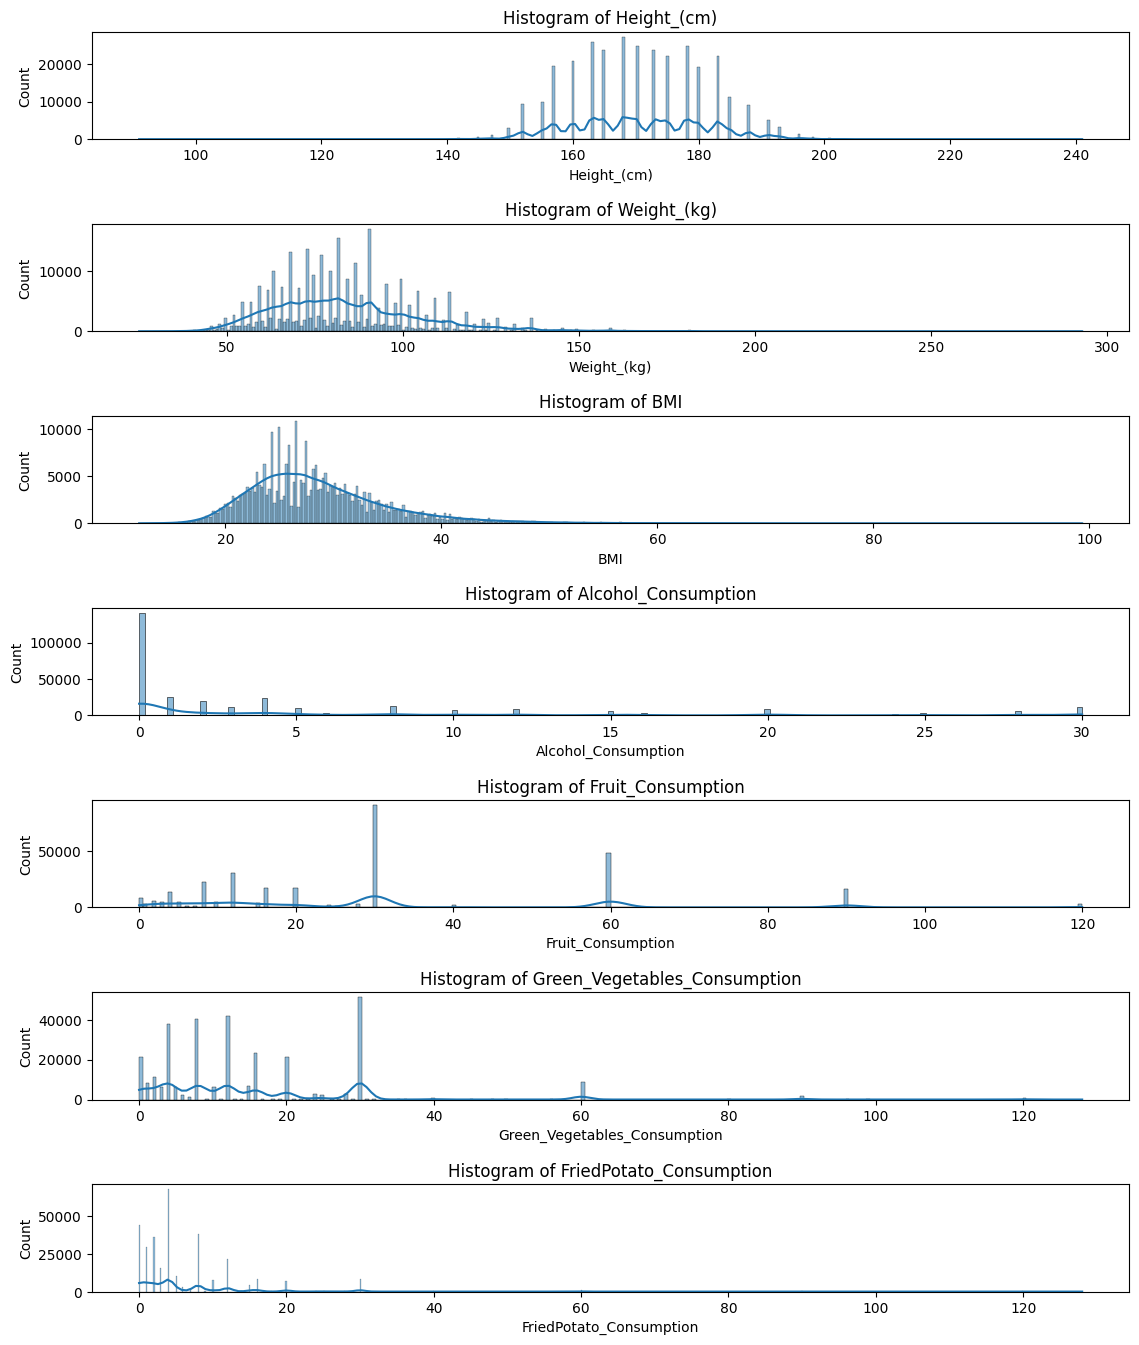

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select numeric columns
numeric_columns = df.select_dtypes(include='float64').columns


# Set up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(12, 2 * len(numeric_columns)))
fig.tight_layout(pad=4.0)

# Plot histograms and kernel density plots for numeric variables
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

plt.show()



Based on the provided numeric summary statistics for the dataset, we can make some observations about the likely distributions of the numeric variables:

1. Height (cm):
The height variable appears to have a relatively normal distribution, as the mean and media are close to each other.

2. Weight (kg):
The weight variable also seems to have a relatively normal distribution. The mean and median are close.

3.BMI (Body Mass Index):
BMI is a derived variable based on height and weight. Its distribution is likely to follow a normal distribution, as the variables from which it is derived (height and weight) also exhibit normal-like distributions.

4. Alcohol Consumption:
The distribution of alcohol consumption appears to be right-skewed.

5. Fruit Consumption:
The distribution of fruit consumption seems to be right-skewed.
6. Green Vegetables Consumption:
The distribution of green vegetables consumption appears to be right-skewed.

7. Fried Potato Consumption:
The distribution of fried potato consumption also appears to be right-skewed. T



In [22]:
#Converting in 1-0 coding for better analysis
df['Heart_Disease'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})
df['General_Health'] = df['General_Health'].map({'Poor': 1, 'Fair': 2,'Good': 3,'Very Good': 4,'Excellent': 5})
df['Exercise'] = df['Exercise'].map({'No': 0, 'Yes': 1})
df['Skin_Cancer'] = df['Skin_Cancer'].map({'No': 0, 'Yes': 1})
df['Other_Cancer'] = df['Other_Cancer'].map({'No': 0, 'Yes': 1})
df['Arthritis'] = df['Arthritis'].map({'No': 0, 'Yes': 1})
df['Sex'] = df['Sex'].map({'Male': 0, 'Female': 1})

In [23]:
df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})

In [24]:
df['Smoking_History'] = df['Smoking_History'].map({'No': 0, 'Yes': 1})

In [25]:
unique_values = df['Checkup'].unique()
print(unique_values)

['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']


In [27]:
df['Age_Category'] = df['Age_Category'].astype("category").cat.codes
df['Checkup'] = df['Checkup'].astype("category").cat.codes
df['Diabetes'] = df['Diabetes'].astype("category").cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int8   
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int8   
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  int8   
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [28]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [29]:
df.head()

General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0               1        2         0              0            0   
1               4        4         0              1            0   
2               4        4         1              0            0   
3               1        4         1              1            0   
4               3        4         0              0            0   

   Other_Cancer  Depression  Diabetes  Arthritis  Sex  Age_Category  \
0             0           0         0          1    1            10   
1             0           0         2          0    1            10   
2             0           0         2          0    1             8   
3             0           0         2          0    0            11   
4             0           0         0          0    0            12   

   Height_(cm)  Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  14.54                1                  0.0   
1        165.0        77.11  28.29                0                  0.0   
2        163.0        88.45  33.47                0                  4.0   
3        180.0        93.44  28.73                0                  0.0   
4        191.0        88.45  24.37                1                  0.0   

   Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  
0               30.0                          16.0                     12.0  
1               30.0                           0.0                      4.0  
2               12.0                           3.0                     16.0  
3               30.0                          30.0                      8.0  
4                8.0                           4.0                      0.0

In [30]:
#Rearraging the target varaible
column_to_move = df.pop("Heart_Disease")
df.insert(18, "Heart_Disease", column_to_move)

In [31]:
df.head()

General_Health  Checkup  Exercise  Skin_Cancer  Other_Cancer  Depression  \
0               1        2         0            0             0           0   
1               4        4         0            0             0           0   
2               4        4         1            0             0           0   
3               1        4         1            0             0           0   
4               3        4         0            0             0           0   

   Diabetes  Arthritis  Sex  Age_Category  Height_(cm)  Weight_(kg)    BMI  \
0         0          1    1            10        150.0        32.66  14.54   
1         2          0    1            10        165.0        77.11  28.29   
2         2          0    1             8        163.0        88.45  33.47   
3         2          0    0            11        180.0        93.44  28.73   
4         0          0    0            12        191.0        88.45  24.37   

   Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0                1                  0.0               30.0   
1                0                  0.0               30.0   
2                0                  4.0               12.0   
3                0                  0.0               30.0   
4                1                  0.0                8.0   

   Green_Vegetables_Consumption  FriedPotato_Consumption  Heart_Disease  
0                          16.0                     12.0              0  
1                           0.0                      4.0              1  
2                           3.0                     16.0              0  
3                          30.0                      8.0              1  
4                           4.0                      0.0              0

 **5.Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

In [32]:
!pip install pandas scikit-learn

 **METHOD 1:Univariate Selection**

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:17]
y = df.iloc[:,-1]
y=y.astype('str')
y.head(10)
y.describe()

count     308854
unique         2
top            0
freq      283883
Name: Heart_Disease, dtype: object

In [34]:
print(X.isnull().sum())
print(y.isnull().sum())

General_Health                  0
Checkup                         0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
dtype: int64
0


In [35]:
X = df.iloc[:,0:17]
y = df.iloc[:,-1]
y=y.astype('int')
y.head(10)
y.describe()
bestFeatures = SelectKBest(score_func= chi2, k = 17)
fit = bestFeatures.fit(X,y)
#Applying SelectKBest class to extract top features
bestFeatures = SelectKBest(score_func= chi2, k = 17)
fit = bestFeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
featureScores.columns = ['Specs','Score']
featureScores


Specs         Score
0                 General_Health   5029.025342
1                        Checkup    636.538377
2                       Exercise    644.897436
3                    Skin_Cancer   2301.556881
4                   Other_Cancer   2381.164106
5                     Depression    261.258916
6                       Diabetes  14534.216225
7                      Arthritis   4922.243030
8                            Sex    783.423584
9                   Age_Category  30769.196487
10                   Height_(cm)     51.206489
11                   Weight_(kg)   3542.262163
12                           BMI    835.533873
13               Smoking_History   2133.349965
14           Alcohol_Consumption   5448.972562
15             Fruit_Consumption   2576.352224
16  Green_Vegetables_Consumption   2632.505458

In [36]:
print(featureScores.nlargest(10,'Score'))

                           Specs         Score
9                   Age_Category  30769.196487
6                       Diabetes  14534.216225
14           Alcohol_Consumption   5448.972562
0                 General_Health   5029.025342
7                      Arthritis   4922.243030
11                   Weight_(kg)   3542.262163
16  Green_Vegetables_Consumption   2632.505458
15             Fruit_Consumption   2576.352224
4                   Other_Cancer   2381.164106
3                    Skin_Cancer   2301.556881


Age_Category:
This feature has the highest score among the selected features, indicating that it is considered highly important for predicting the target variable.
Diabetes:
Diabetes is the second most important feature according to the scores.

**METHOD 2: Correlation Matrix with HeatMap**

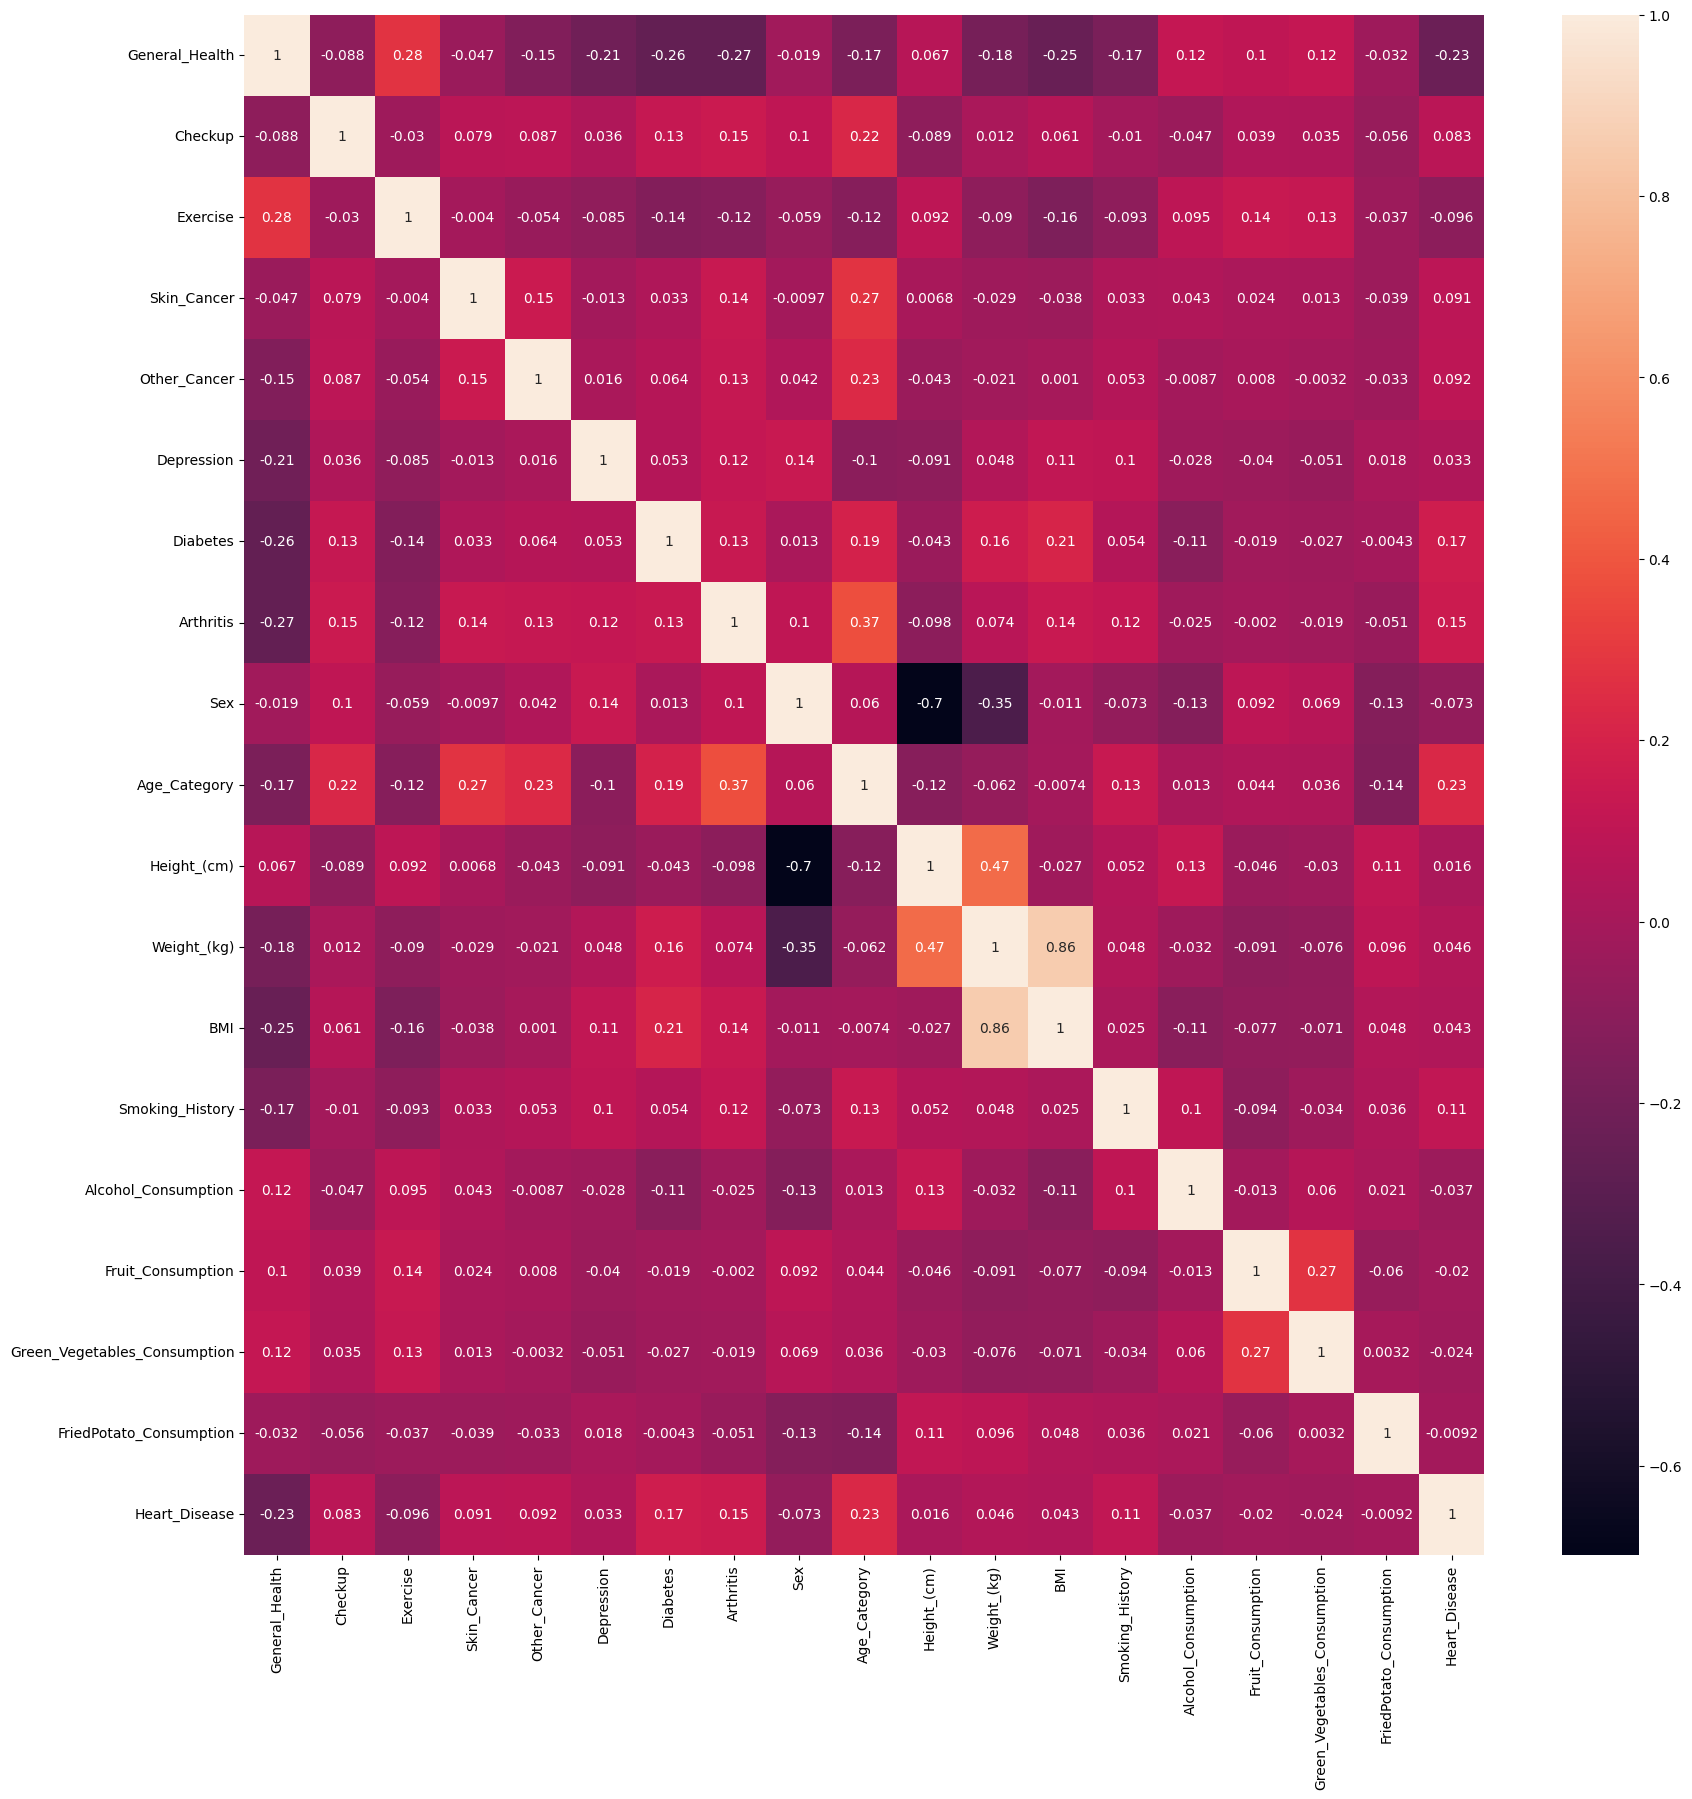

In [37]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(df[top_corr_features].corr(), annot= True)

Intensity of Colors:
Darker colors (closer to 1 or -1) indicate stronger correlations, while lighter colors (closer to 0) indicate weaker correlations.

The values range from -1 to 1, where:
1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation,
0 indicates no correlation.


**METHOD 3 : Feature Importance**

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [39]:
print(model.feature_importances_)

[0.06212406 0.01909784 0.01497577 0.01223567 0.01328011 0.01585717
 0.0280212  0.01636135 0.01361089 0.09582653 0.11819615 0.13288207
 0.13797858 0.01213585 0.07804953 0.10957311 0.11979412]


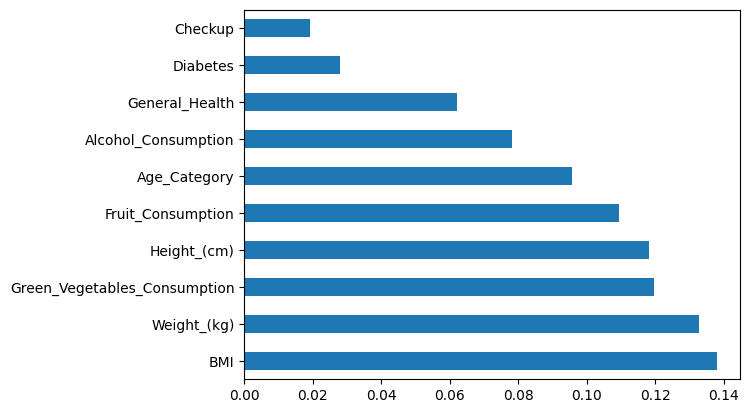

In [40]:
#Horizontal bar chart for feature importance
feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

Higher values suggest that the corresponding feature is more important in predicting the target variable.


*   We don't need the Checkup category  as it is seen as the least important feature




 **6. Do the ranges of the predictor variables make sense?**

In [41]:
df.max() - df.min()

General_Health                    4.00
Checkup                           4.00
Exercise                          1.00
Skin_Cancer                       1.00
Other_Cancer                      1.00
Depression                        1.00
Diabetes                          3.00
Arthritis                         1.00
Sex                               1.00
Age_Category                     12.00
Height_(cm)                     150.00
Weight_(kg)                     268.07
BMI                              87.31
Smoking_History                   1.00
Alcohol_Consumption              30.00
Fruit_Consumption               120.00
Green_Vegetables_Consumption    128.00
FriedPotato_Consumption         128.00
Heart_Disease                     1.00
dtype: float64

In [42]:
df.describe()

General_Health        Checkup       Exercise    Skin_Cancer  \
count   308854.000000  308854.000000  308854.000000  308854.000000   
mean         3.530448       3.515069       0.775062       0.097114   
std          1.031224       1.019576       0.417542       0.296113   
min          1.000000       0.000000       0.000000       0.000000   
25%          3.000000       4.000000       1.000000       0.000000   
50%          4.000000       4.000000       1.000000       0.000000   
75%          4.000000       4.000000       1.000000       0.000000   
max          5.000000       4.000000       1.000000       1.000000   

        Other_Cancer     Depression       Diabetes      Arthritis  \
count  308854.000000  308854.000000  308854.000000  308854.000000   
mean        0.096738       0.200422       0.308159       0.327245   
std         0.295602       0.400316       0.724383       0.469208   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       3.000000       1.000000   

                 Sex   Age_Category    Height_(cm)    Weight_(kg)  \
count  308854.000000  308854.000000  308854.000000  308854.000000   
mean        0.518679       6.535888     170.615249      83.588655   
std         0.499652       3.523526      10.658026      21.343210   
min         0.000000       0.000000      91.000000      24.950000   
25%         0.000000       4.000000     163.000000      68.040000   
50%         1.000000       7.000000     170.000000      81.650000   
75%         1.000000       9.000000     178.000000      95.250000   
max         1.000000      12.000000     241.000000     293.020000   

                 BMI  Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
count  308854.000000    308854.000000        308854.000000      308854.000000   
mean       28.626211         0.405577             5.096366          29.835200   
std         6.522323         0.491004             8.199763          24.875735   
min        12.020000         0.000000             0.000000           0.000000   
25%        24.210000         0.000000             0.000000          12.000000   
50%        27.440000         0.000000             1.000000          30.000000   
75%        31.850000         1.000000             6.000000          30.000000   
max        99.330000         1.000000            30.000000         120.000000   

       Green_Vegetables_Consumption  FriedPotato_Consumption  Heart_Disease  
count                 308854.000000            308854.000000  308854.000000  
mean                      15.110441                 6.296616       0.080850  
std                       14.926238                 8.582954       0.272606  
min                        0.000000                 0.000000       0.000000  
25%                        4.000000                 2.000000       0.000000  
50%                       12.000000                 4.000000       0.000000  
75%                       20.000000                 8.000000       0.000000  
max                      128.000000               128.000000       1.000000

To assess whether these ranges make sense, we have to consider the context of the data and the nature of each variable..The max range where value is 241, is an abnormal height which is unusual. The observation may contain false observations.

 **7.Is the predictor variables independent of all the other predictor variables?**

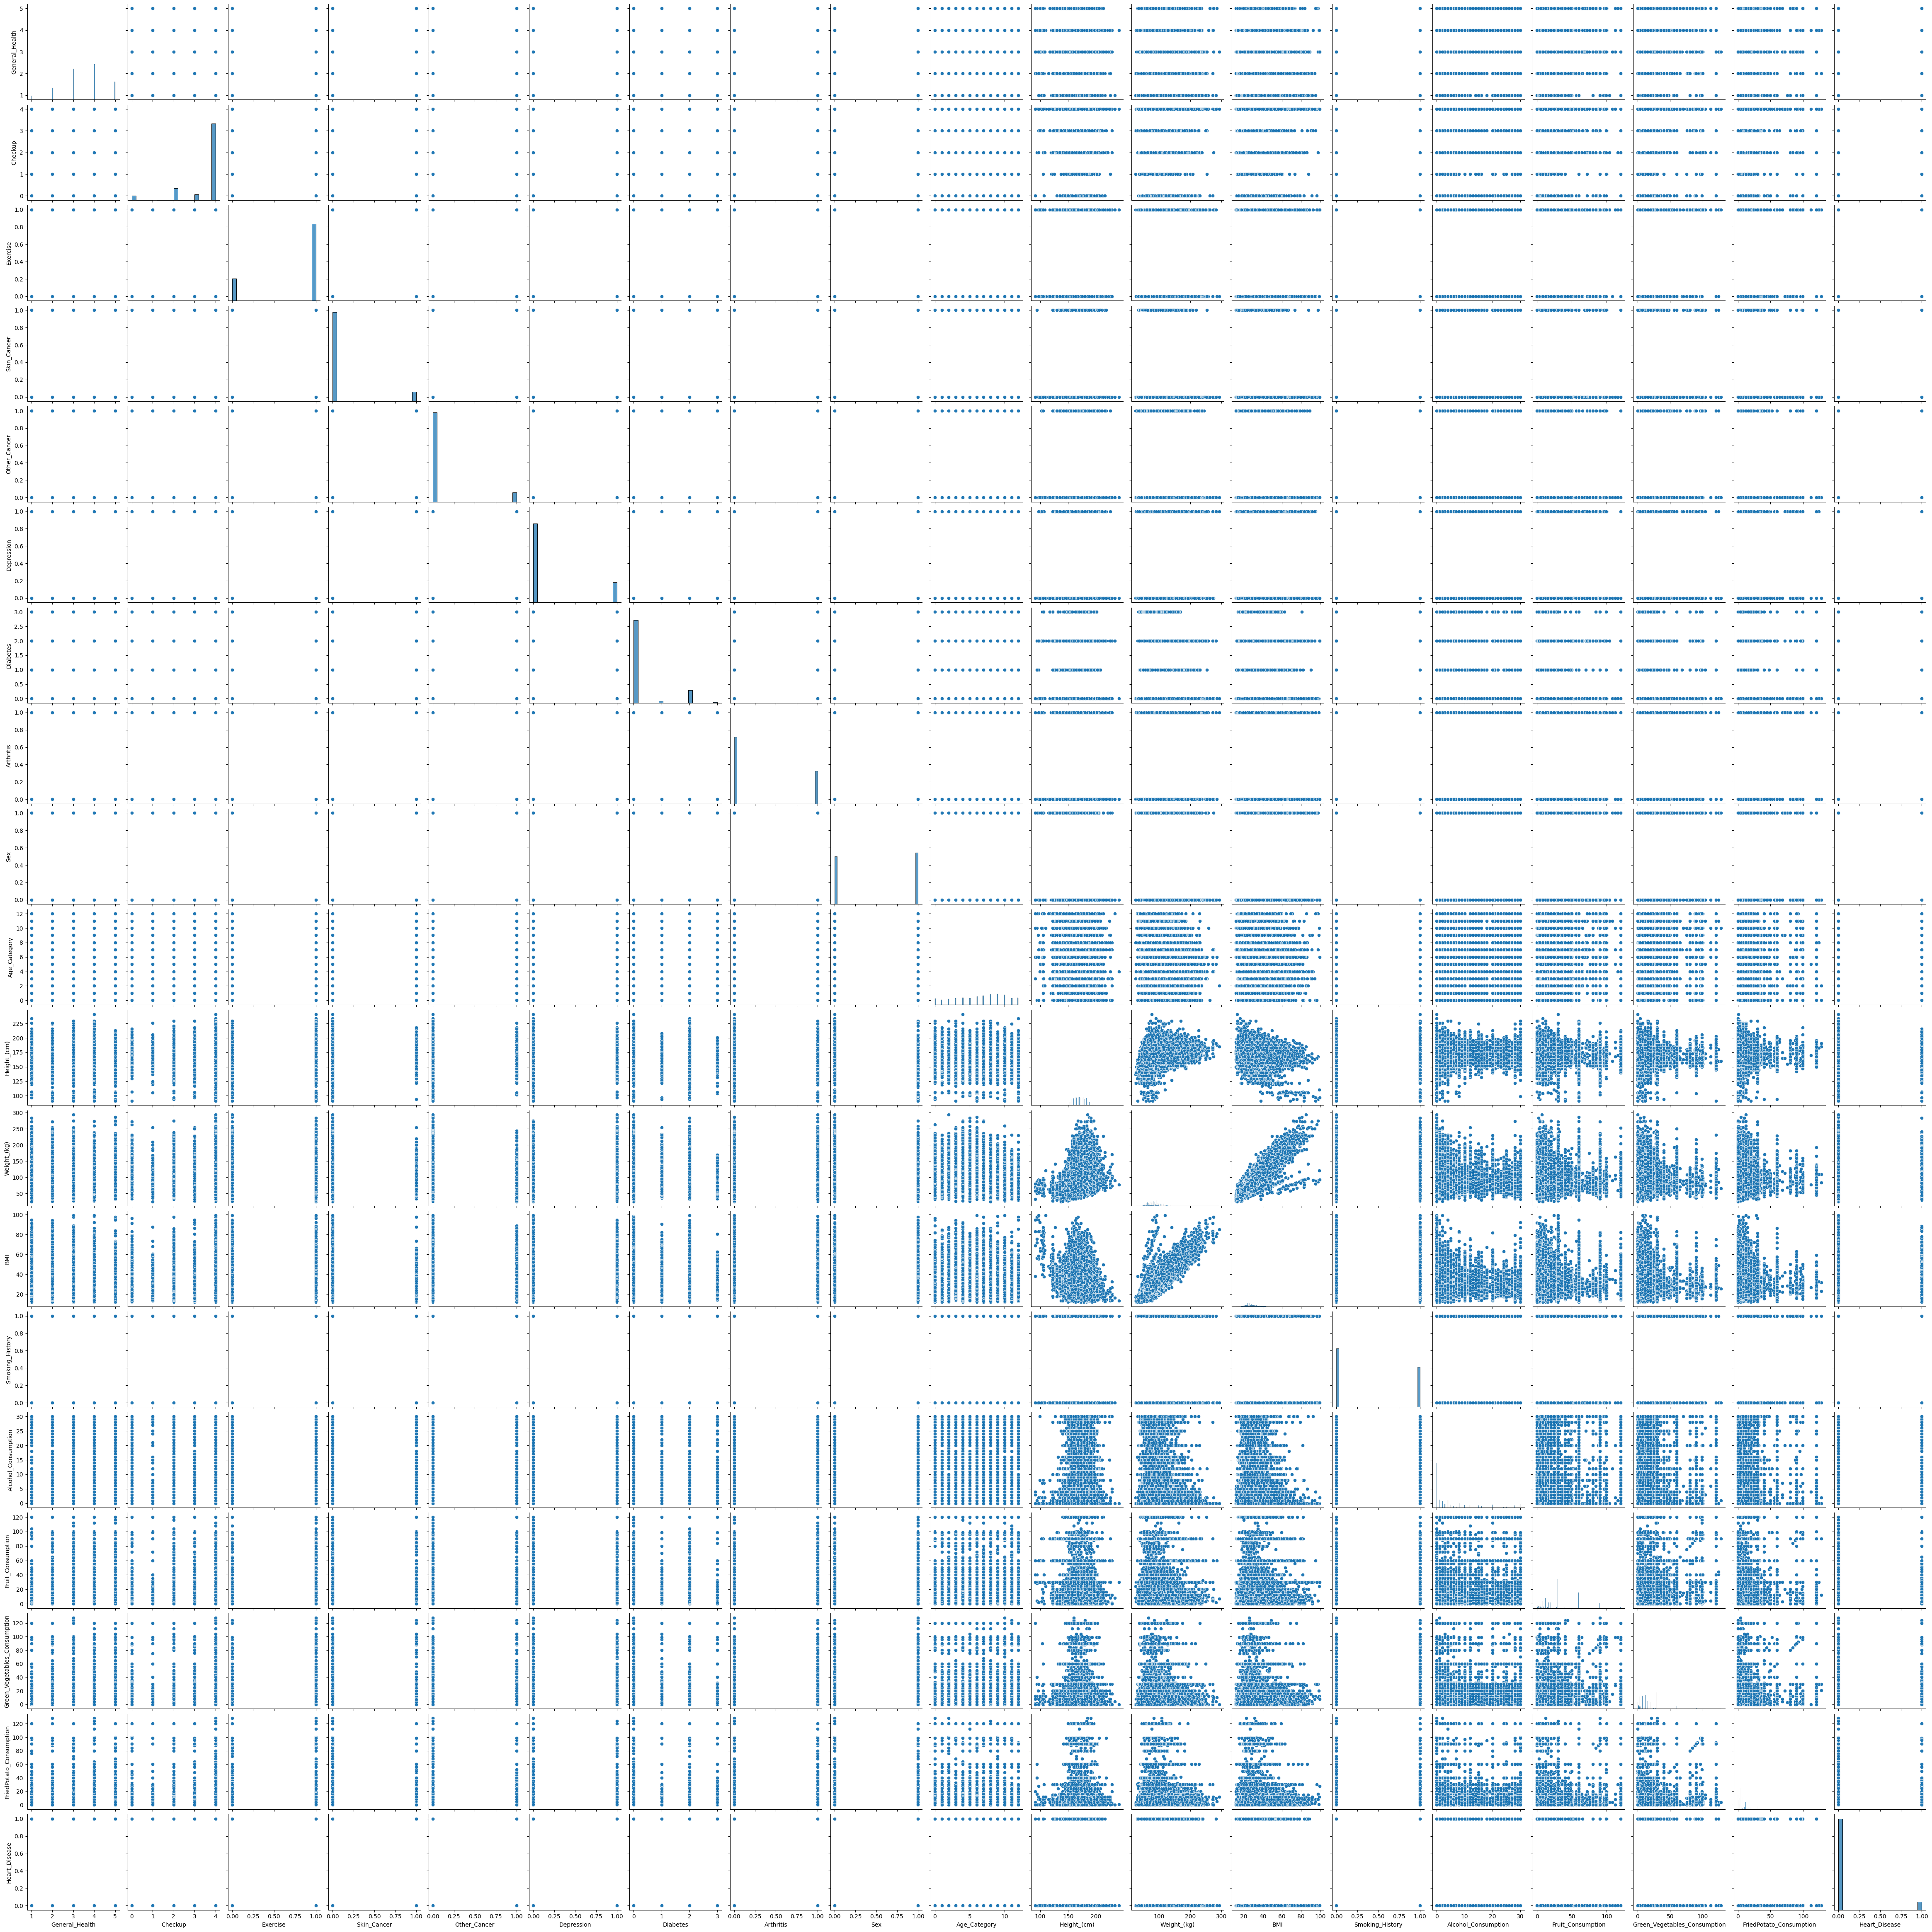

In [43]:
import seaborn as sns
sns.pairplot(df)

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables
*  We see that whatever are linear are dependent variables
*   We see that BMI and height are dependent on each other obviously because BMI is calculated taking height into consideration
*  We see that BMI and weight are dependent on each other obviously because BMI is calculated taking weight into consideration
*    A lack of a clear pattern or trend in the scatterplots can indicate independence.





**8.What are the distributions of the predictor variables?**

<ipython-input-44-e3c522923989>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)
<ipython-input-44-e3c522923989>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], fit = norm)
<ipython-input-44-e3c522923989>:4: UserWarning: 

`distplot` is a deprecated function and will b

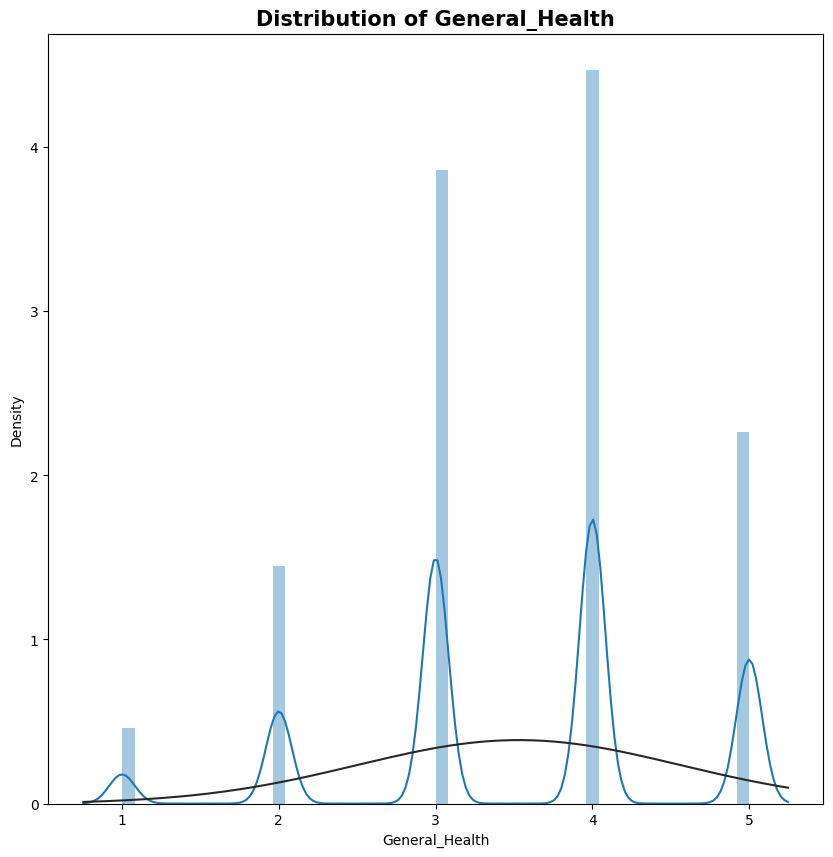

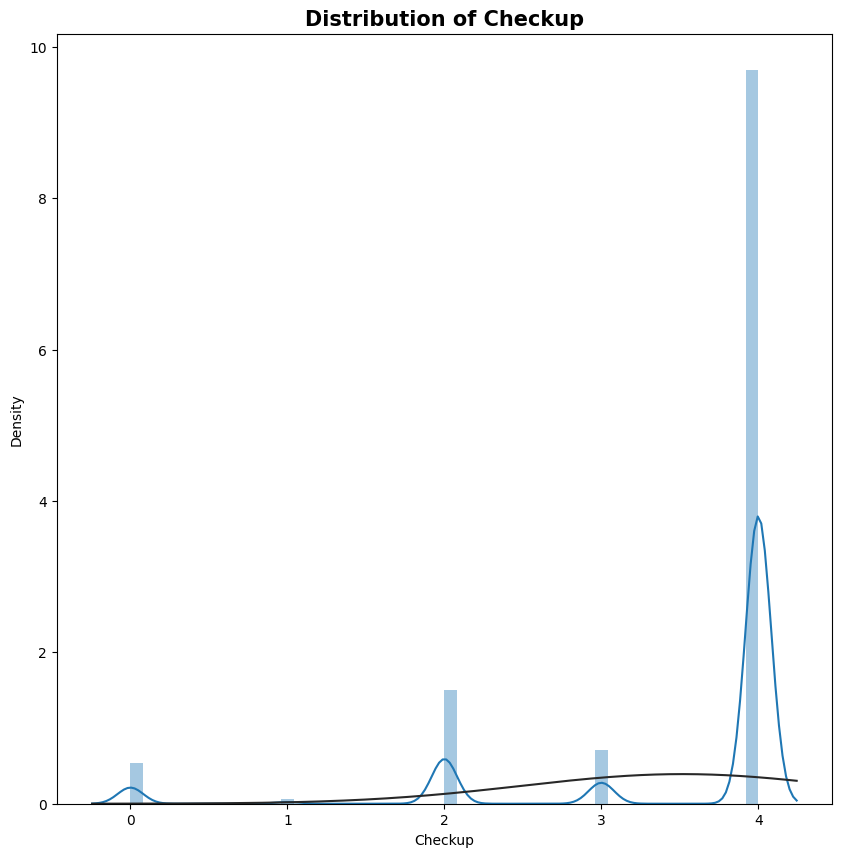

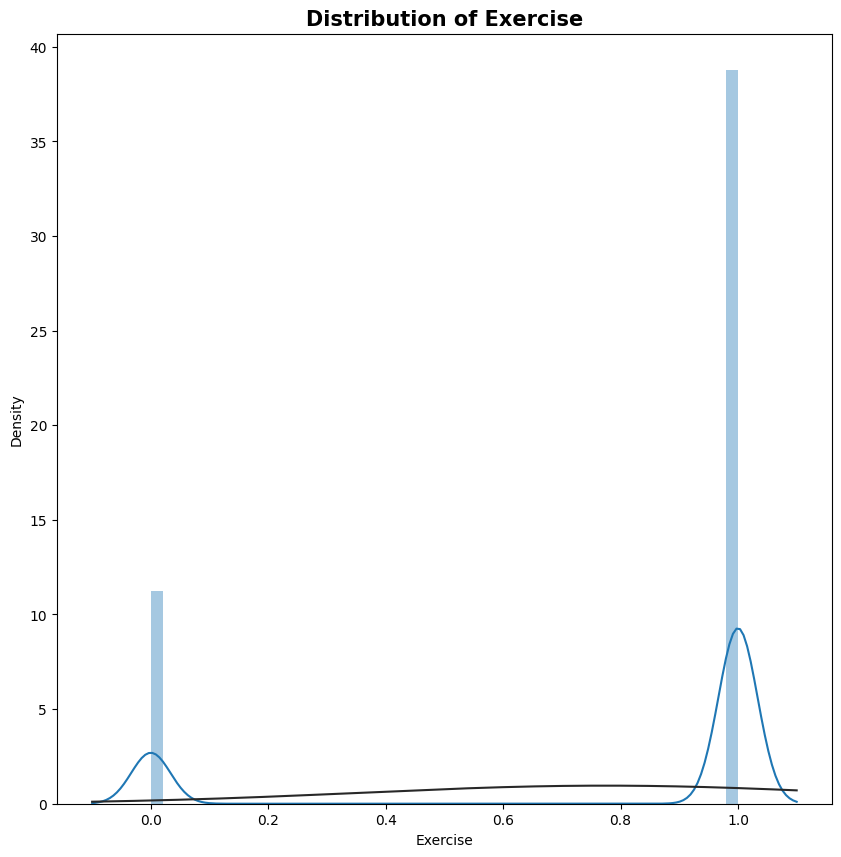

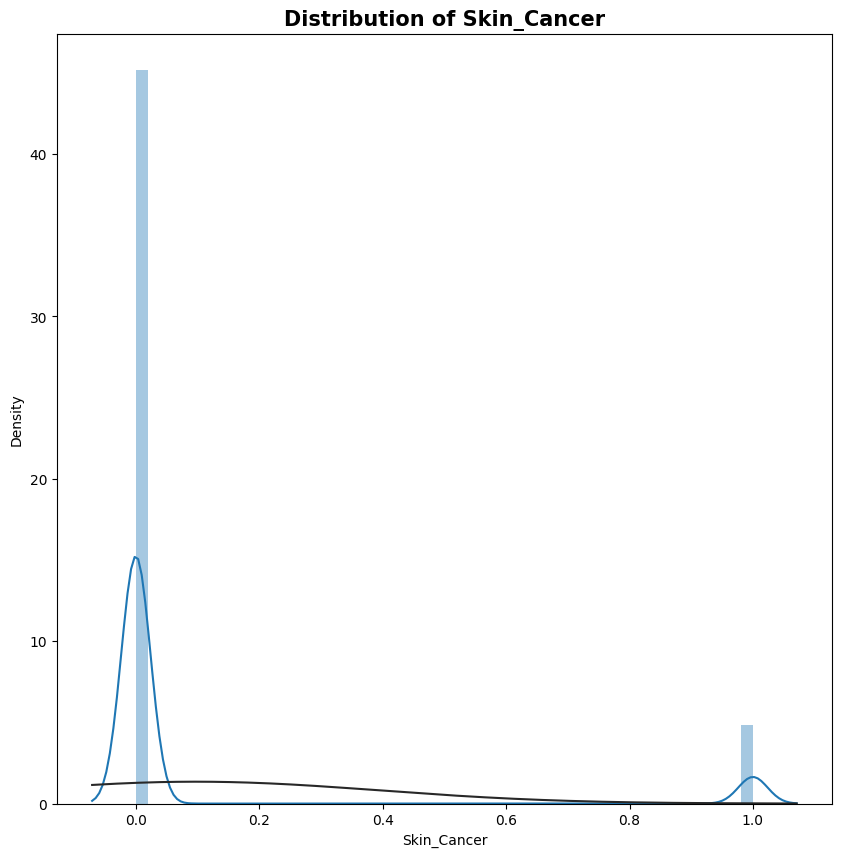

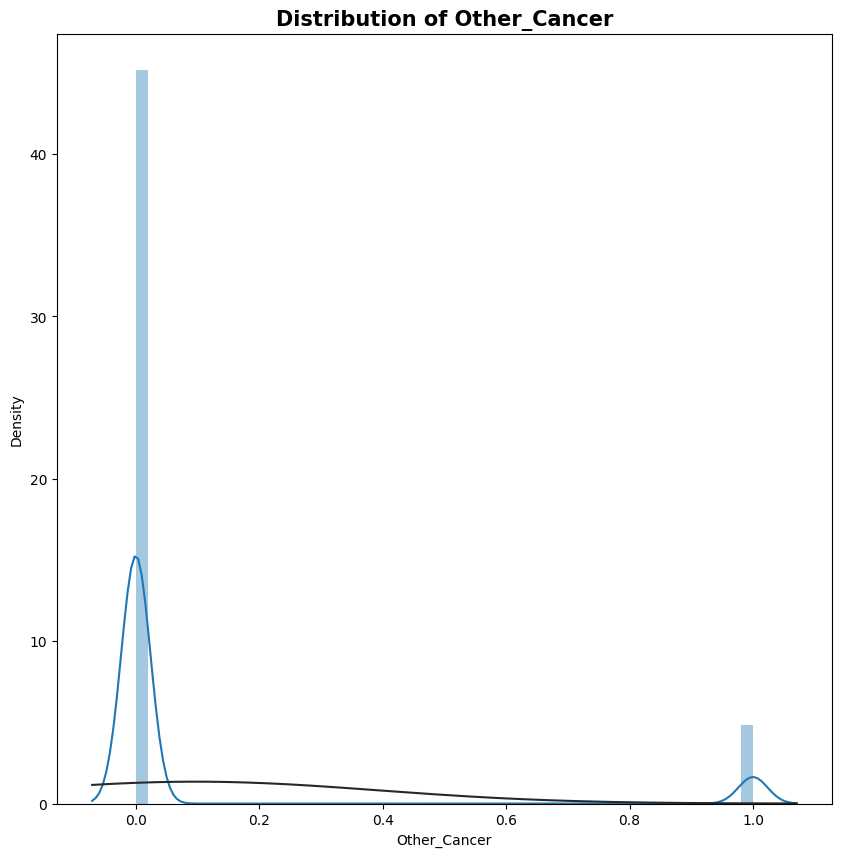

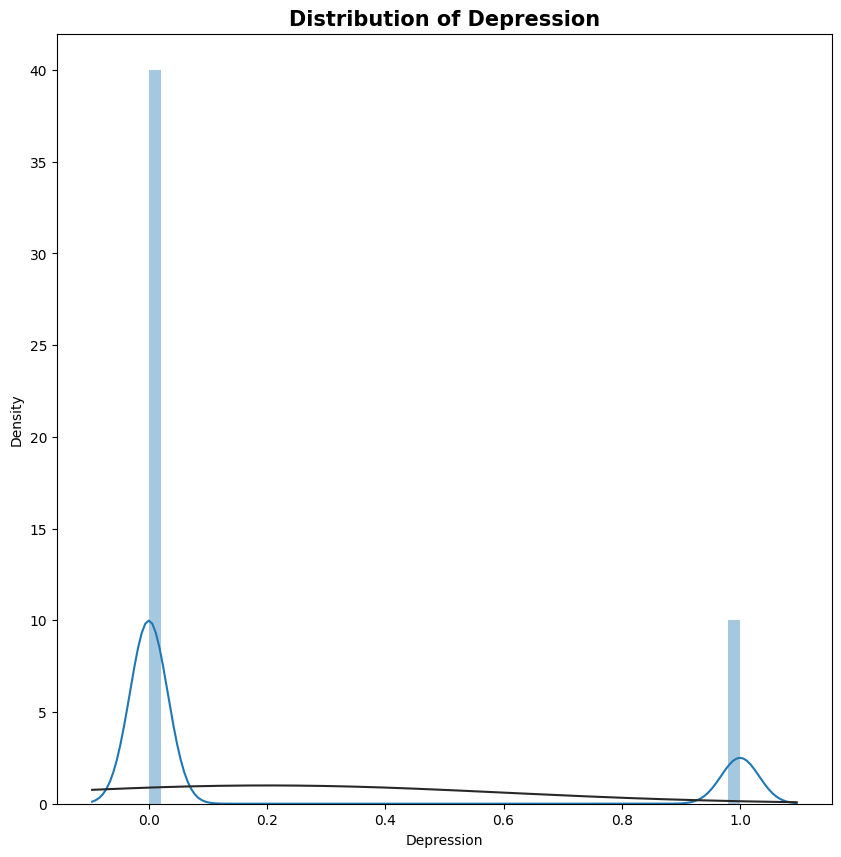

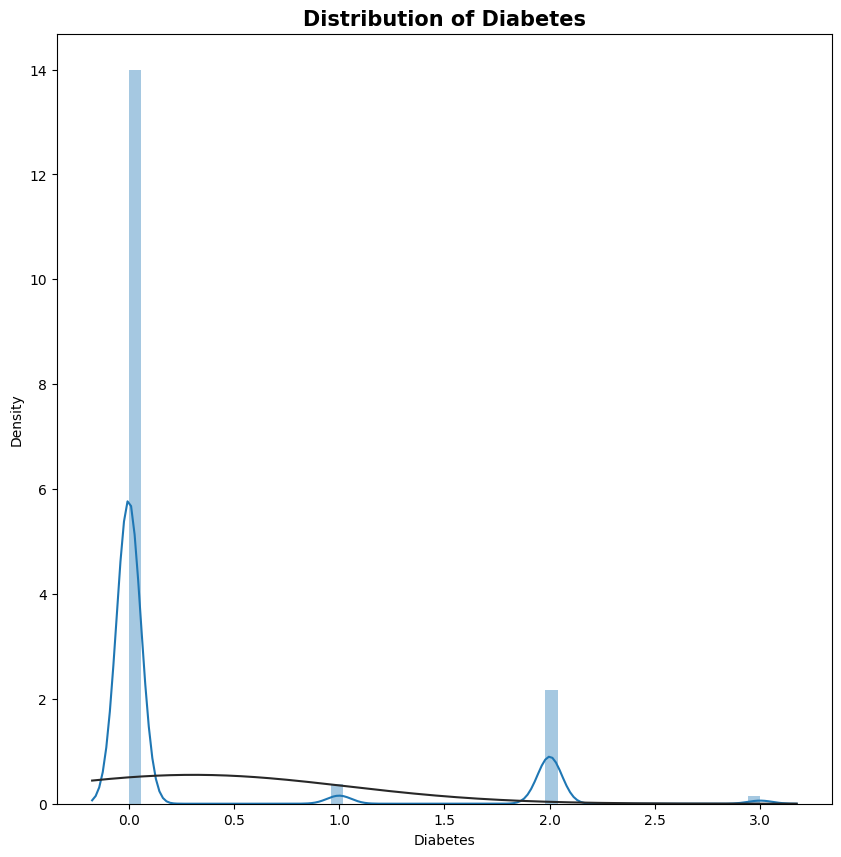

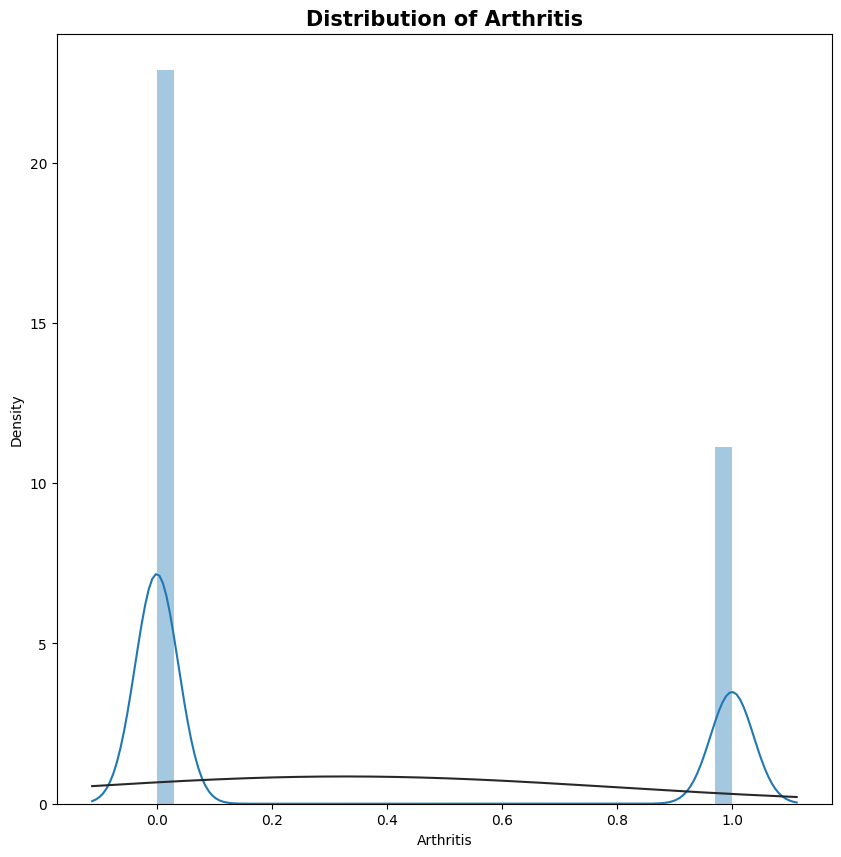

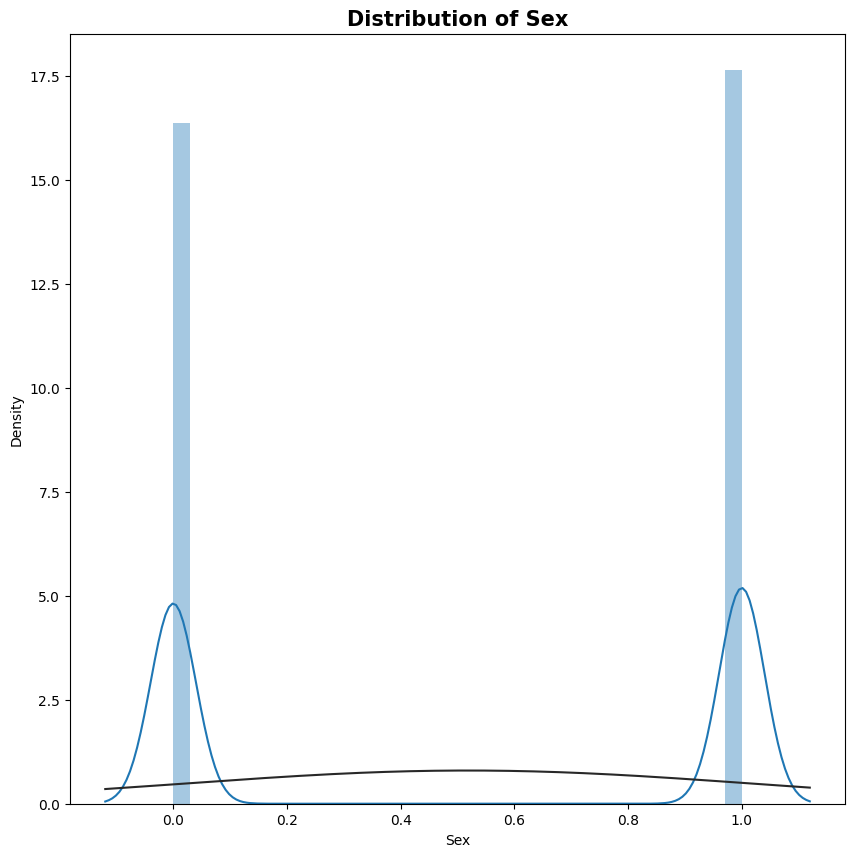

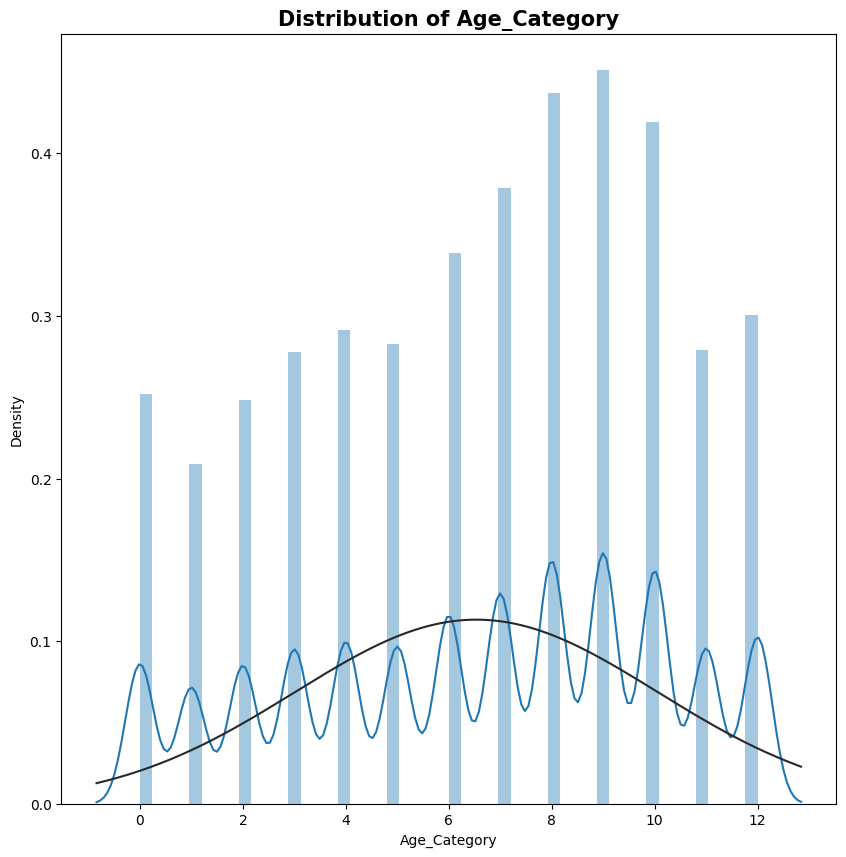

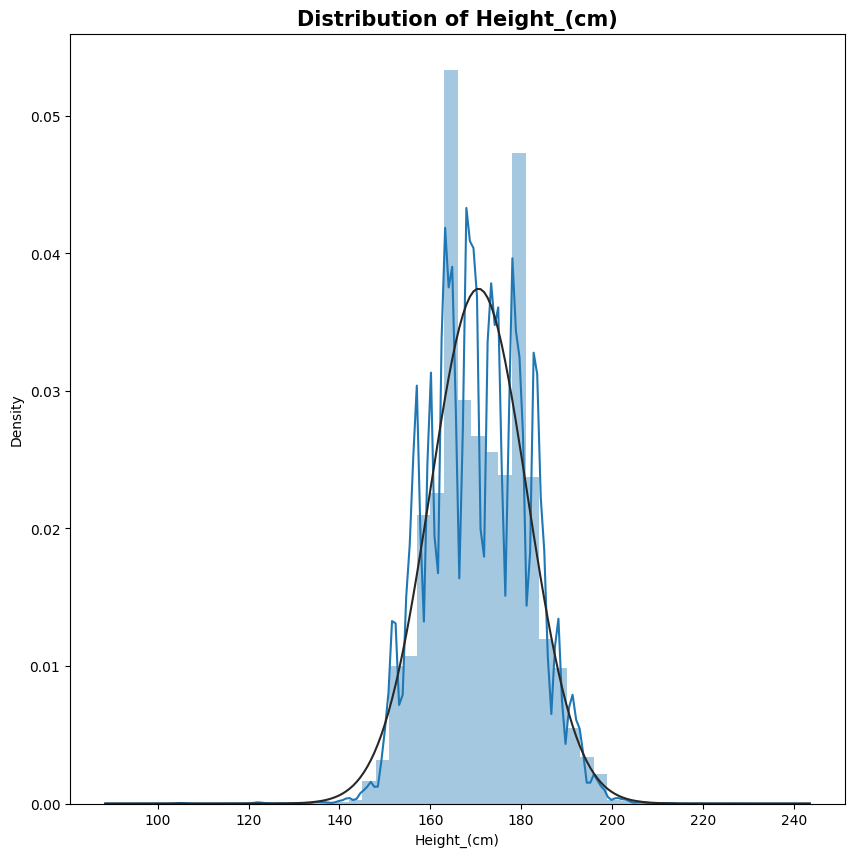

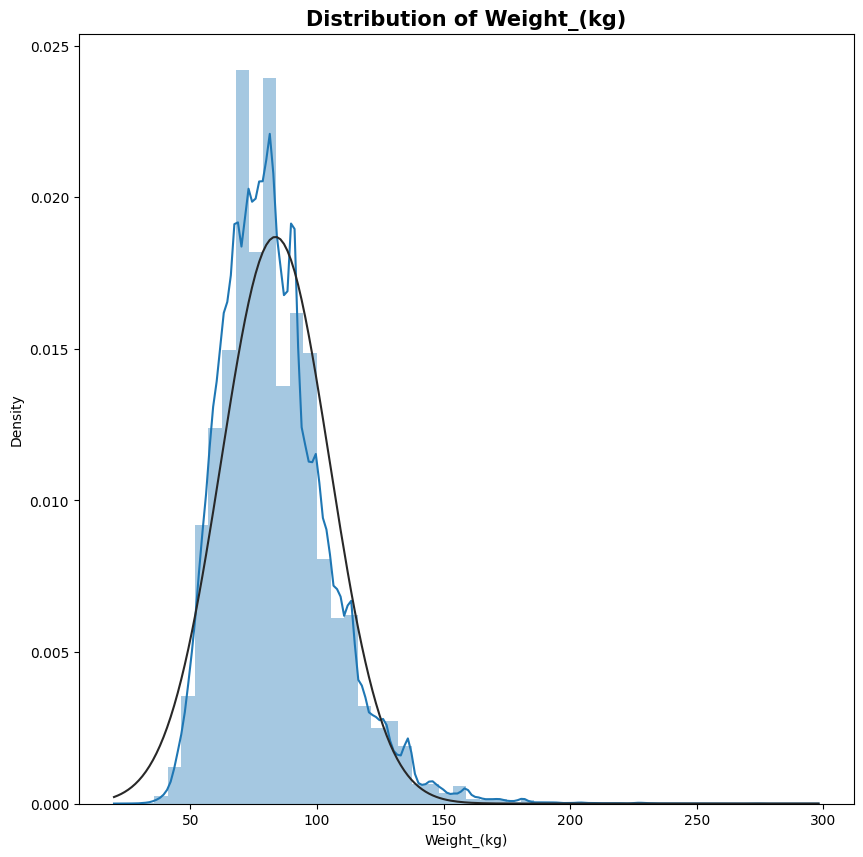

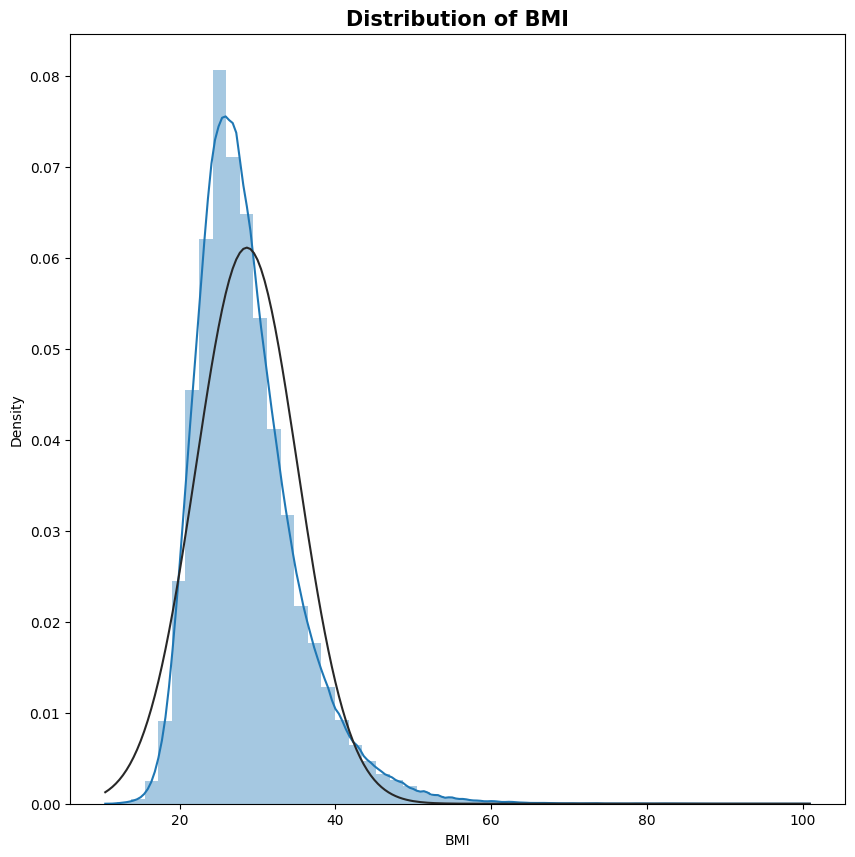

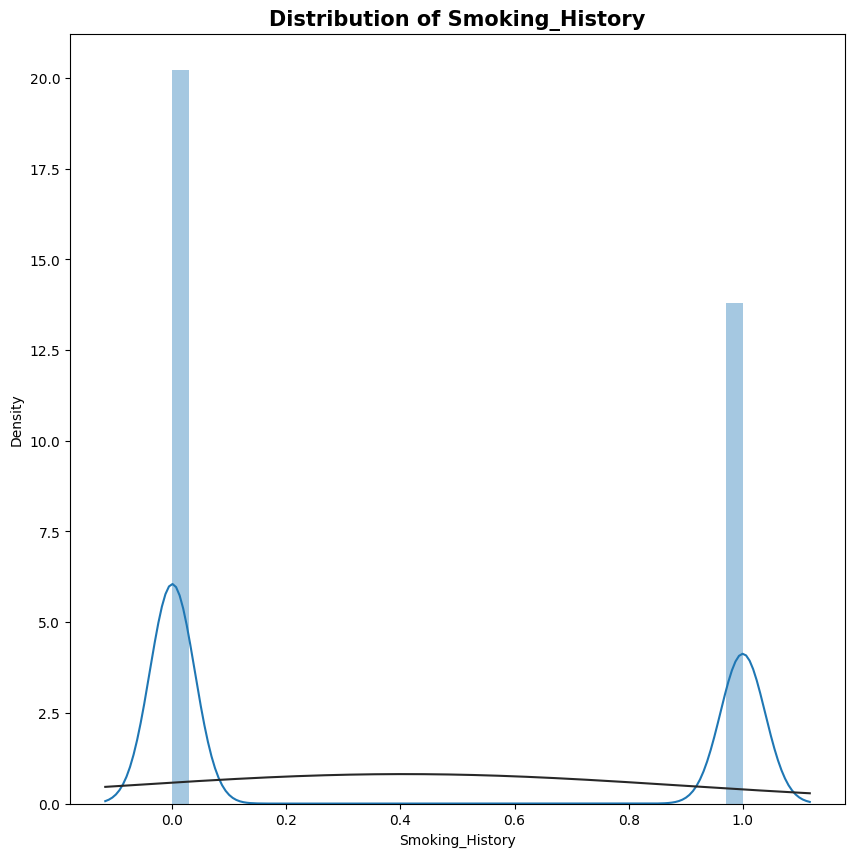

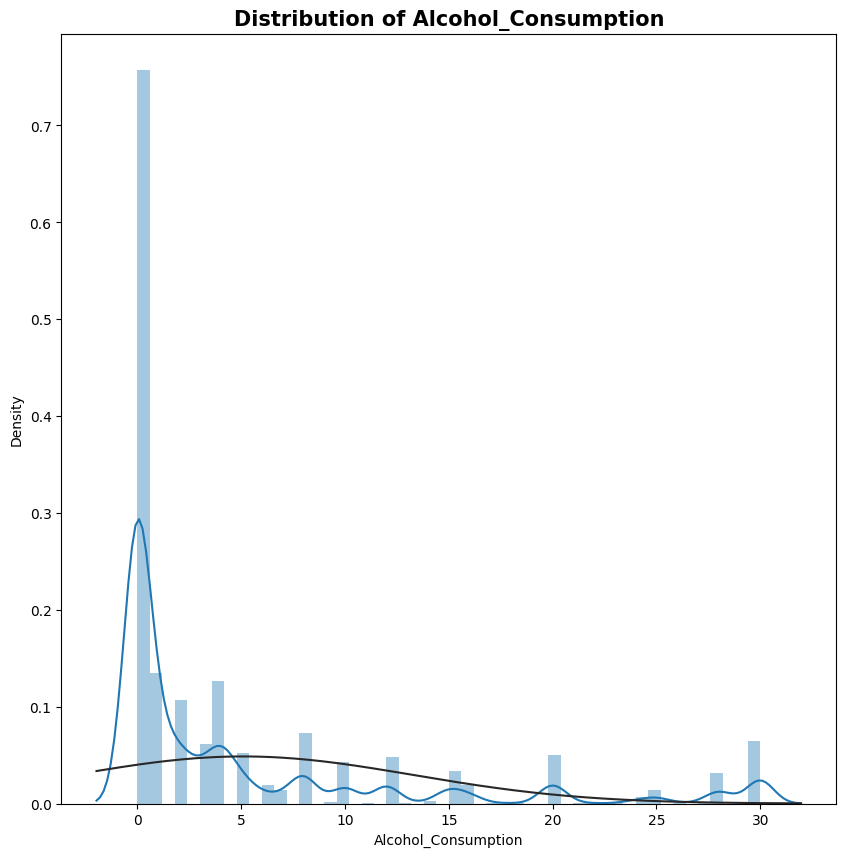

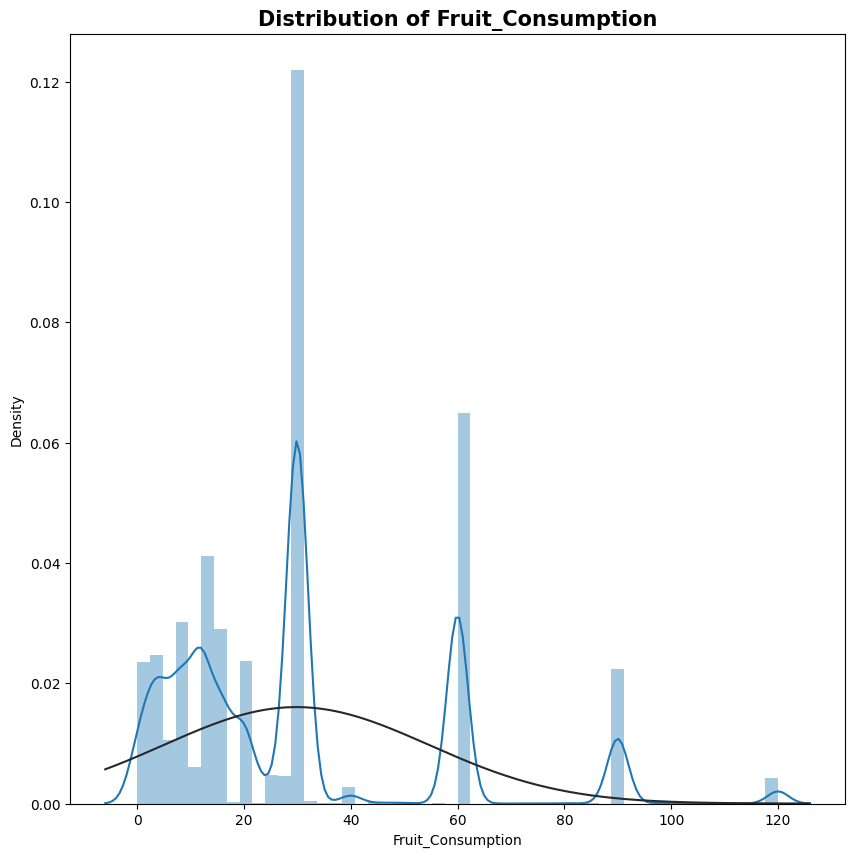

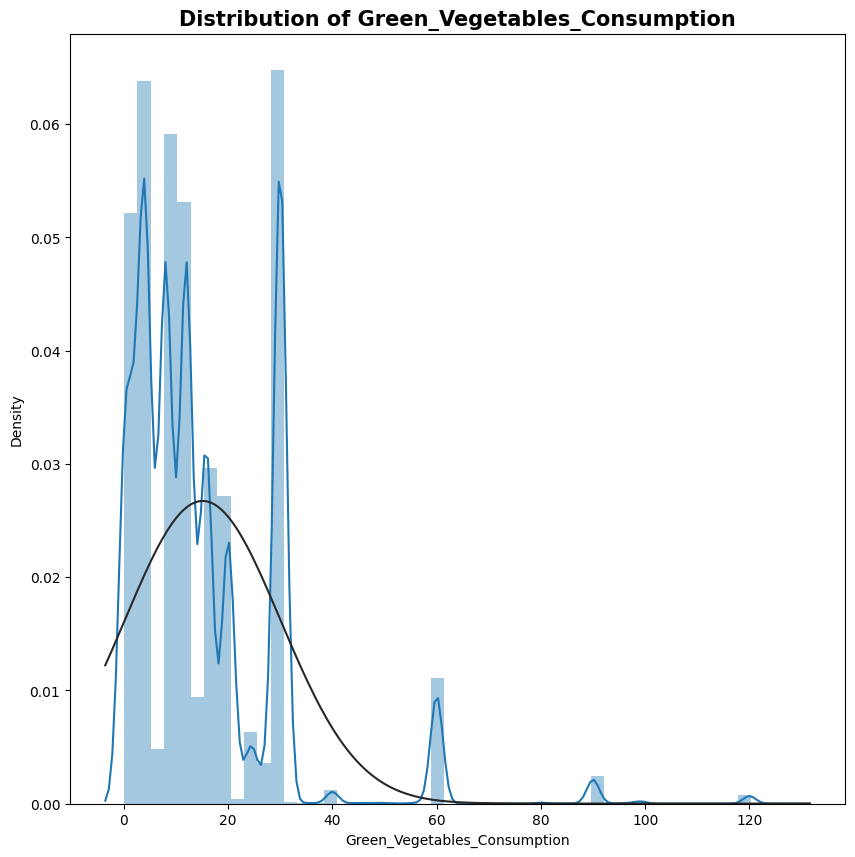

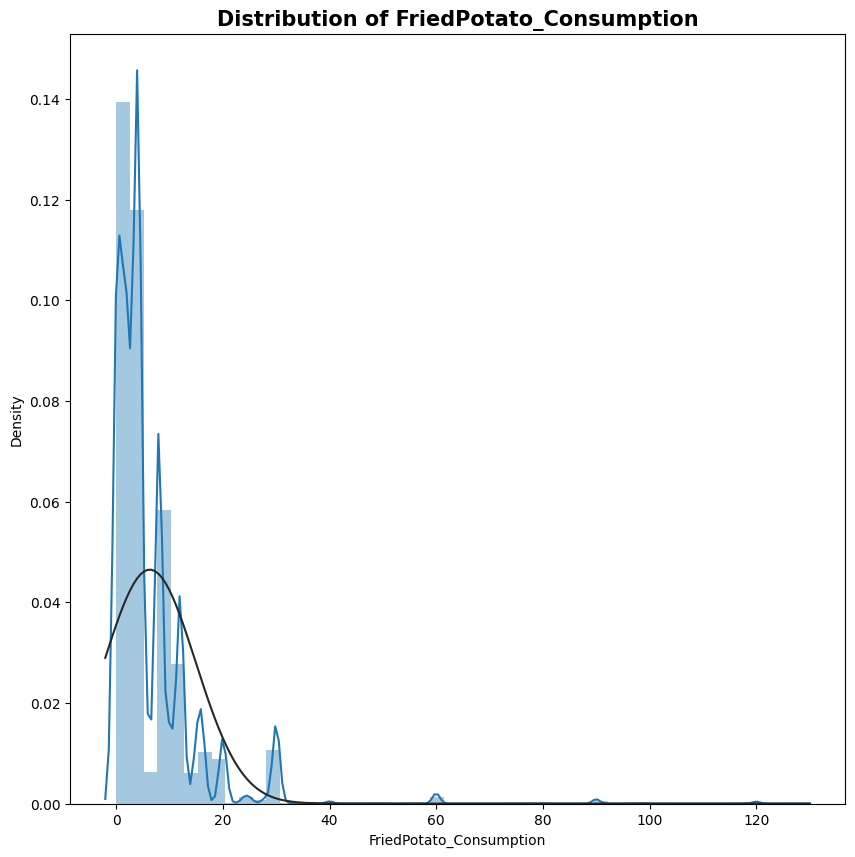

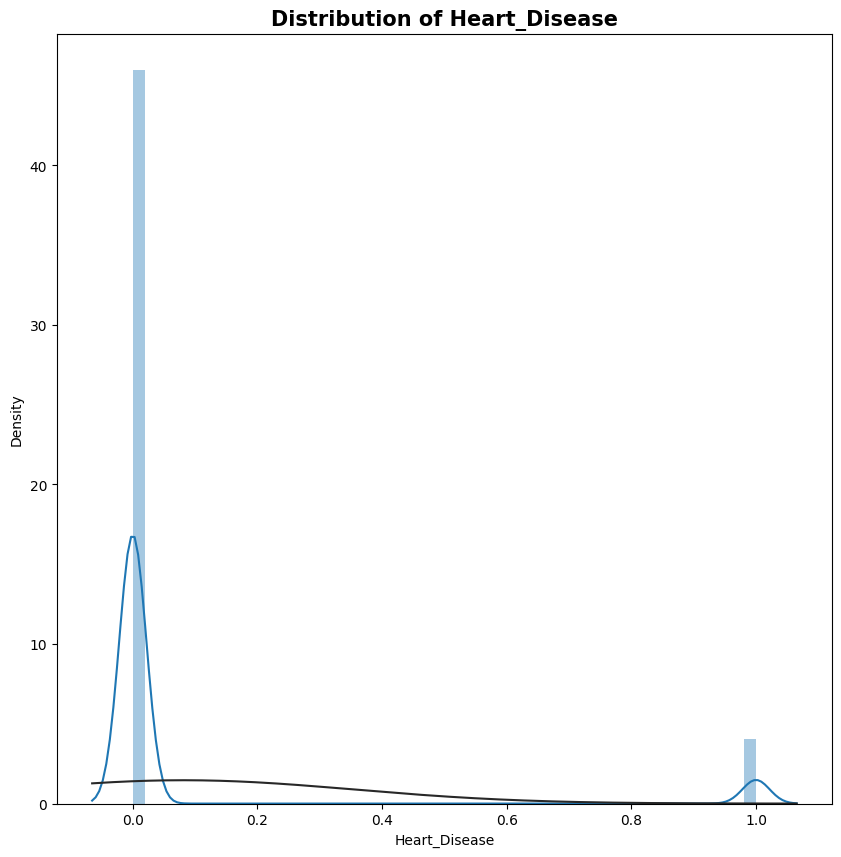

In [44]:
dfColumnList = df.columns
for i in dfColumnList:
  plt.figure(figsize= (10,10))
  sns.distplot(df[i], fit = norm)
  plt.title(f"Distribution of {i}",size = 15, weight = "bold")

EXPLAIN: Distribution plots for each predictor variable.


*   All predictors have a right skewed positve distribution. The skewness of the Heart disease has been normalised.







**9. Which predictor variables are the most important?**
Retrieve feature importance scores:



In [45]:
# Get feature importances
feature_importances = model.feature_importances_

#DataFrame to display feature name,importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#Top features
print(feature_importance_df.head())

                         Feature  Importance
12                           BMI    0.137979
11                   Weight_(kg)    0.132882
16  Green_Vegetables_Consumption    0.119794
10                   Height_(cm)    0.118196
15             Fruit_Consumption    0.109573


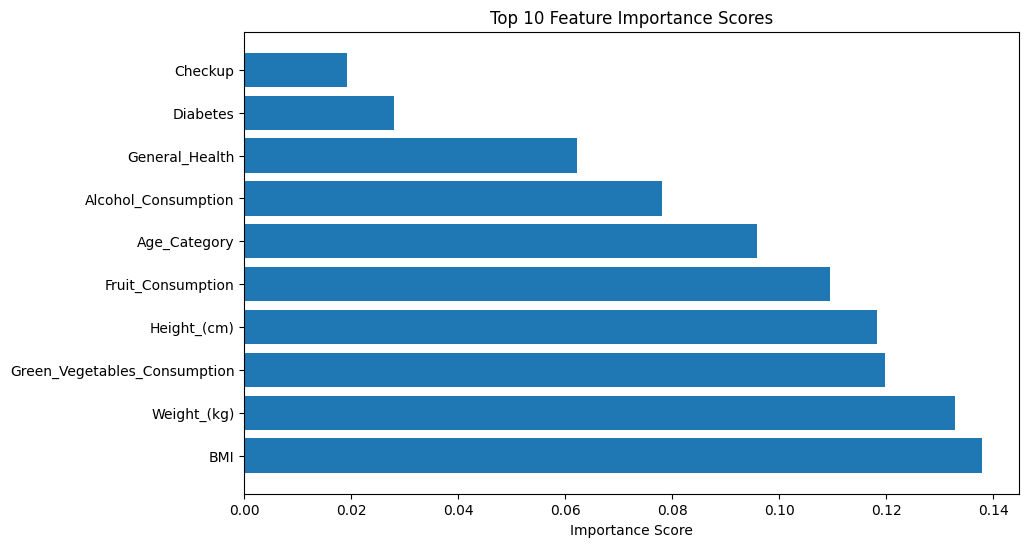

In [46]:
import matplotlib.pyplot as plt

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importance Scores')
plt.show()


* From the observations, it is clear that BMI, Weight, Green vegetables consumption and height are the most important predictors

**10.Remove outliers and keep outliers (does it have an effect of the final predictive model)?**

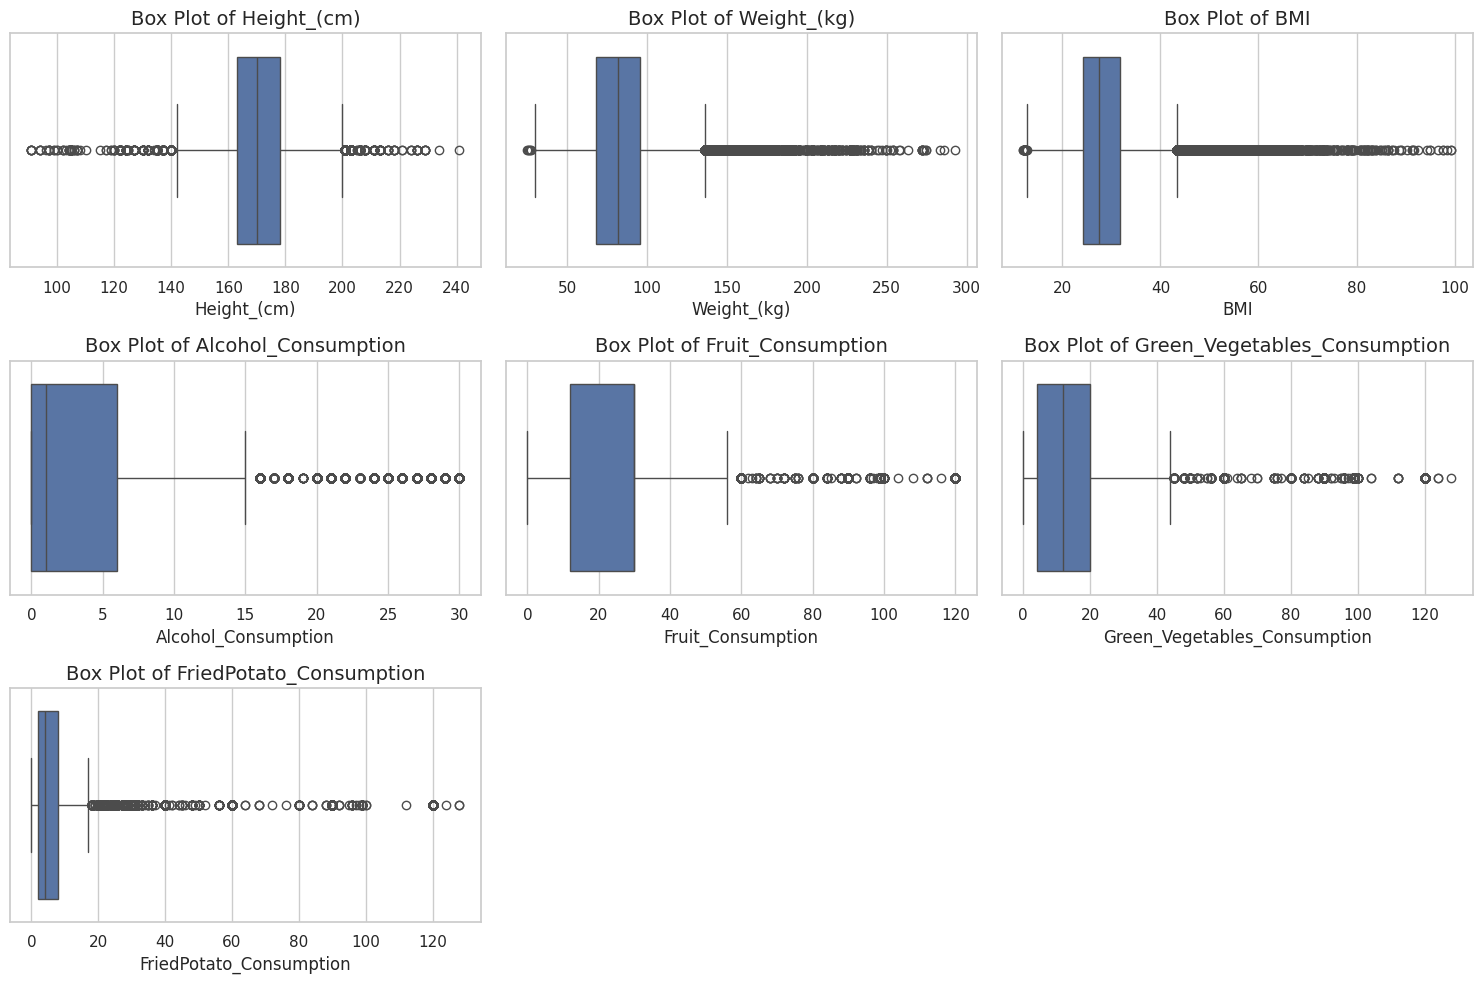

In [246]:
#First we will the if there are outliers
#box plot
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}', fontsize=14)

plt.tight_layout()
plt.show()


**A:Remove outliers:**

In [48]:
import pandas as pd
# Identify and remove outliers using Z-scores
z_scores = (df - df.mean()) / df.std()
filtered_df = df[(z_scores <=3).all(axis=1)]  # Keep data points within 3 standard deviations
print("Shape of filtered dataset:", filtered_df.shape)

Shape of filtered dataset: (211931, 19)


**B**. Keep outliers:

In [49]:
df.shape

(308854, 19)

Calculating Accuracy and Confusion matrix without outliners

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = filtered_df.drop('Heart_Disease', axis=1)
y = filtered_df['Heart_Disease']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier (you can replace this with your specific model)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Shape of X_train: (148351, 18)
Shape of X_test: (63580, 18)
Shape of y_train: (148351,)
Shape of y_test: (63580,)
Accuracy: 1.0000
Confusion Matrix:
[[63580]]


People who have heart disease are the outliers themselves because their z score is greater than 3. That is why those observations are removed from the dataframe. Model only gets observations who do not have heart disease i.e heart disease = 0. This means that when we want to predict the heart disease we need to keep the outliers.

**11. Test/Train data** The train and test sets are split at a ratio of 70/30 from the same dataset.

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
overlap = any(index in X_train.index for index in X_test.index)

if overlap:
    print("The training and test sets have overlapping indices.")
else:
    print("The training and test sets do not have overlapping indices.")


Shape of X_train: (216197, 18)
Shape of X_test: (92657, 18)
Shape of y_train: (216197,)
Shape of y_test: (92657,)
The training and test sets do not have overlapping indices.


In [39]:
import pandas as pd
# Concatenate X_train and y_train along columns
train_df = pd.concat([X_train, pd.DataFrame({'Heart_Disease': y_train})], axis=1)
print("Shape of the combined training dataset:", train_df.shape)


Shape of the combined training dataset: (216197, 19)


In [40]:
import pandas as pd
# Concatenate X_train and y_train along columns
test_df = pd.concat([X_test, pd.DataFrame({'Heart_Disease': y_test})], axis=1)
print("Shape of the combined training dataset:", test_df.shape)


Shape of the combined training dataset: (92657, 19)


In [55]:
df_X_train = pd.DataFrame(X_train)
df_X_test = pd.DataFrame(X_test)

if df_X_train.equals(df_X_test):
    print("The training and test sets have the same data.")
else:
    print("The training and test sets are different.")



The training and test sets are different.


In [56]:
df.head()

General_Health  Checkup  Exercise  Skin_Cancer  Other_Cancer  Depression  \
0               1        2         0            0             0           0   
1               4        4         0            0             0           0   
2               4        4         1            0             0           0   
3               1        4         1            0             0           0   
4               3        4         0            0             0           0   

   Diabetes  Arthritis  Sex  Age_Category  Height_(cm)  Weight_(kg)    BMI  \
0         0          1    1            10        150.0        32.66  14.54   
1         2          0    1            10        165.0        77.11  28.29   
2         2          0    1             8        163.0        88.45  33.47   
3         2          0    0            11        180.0        93.44  28.73   
4         0          0    0            12        191.0        88.45  24.37   

   Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0                1                  0.0               30.0   
1                0                  0.0               30.0   
2                0                  4.0               12.0   
3                0                  0.0               30.0   
4                1                  0.0                8.0   

   Green_Vegetables_Consumption  FriedPotato_Consumption  Heart_Disease  
0                          16.0                     12.0              0  
1                           0.0                      4.0              1  
2                           3.0                     16.0              0  
3                          30.0                      8.0              1  
4                           4.0                      0.0              0

In [57]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Heart_Disease'],
      dtype='object')

**12. Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [64]:
!pip install fancyimpute
from fancyimpute import IterativeImputer as MICE
from fancyimpute import KNN
!pip install fitter
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats as stats

1. This operation doesn't involve any imputation or modification of the data; instead, it creates new columns with the same data as the 'Height_(cm)' column.As imputation is the goal this would be the first step.

In [71]:
df_imputation= df[['Height_(cm)']]
df_imputation['1_percent'] = df_imputation[['Height_(cm)']]
df_imputation['5_percent'] = df_imputation[['Height_(cm)']]
df_imputation['10_percent'] = df_imputation[['Height_(cm)']]
df_imputation.head()

<ipython-input-71-a2996579a2cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['1_percent'] = df_imputation[['Height_(cm)']]
<ipython-input-71-a2996579a2cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['5_percent'] = df_imputation[['Height_(cm)']]
<ipython-input-71-a2996579a2cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Height_(cm)  1_percent  5_percent  10_percent
0        150.0      150.0      150.0       150.0
1        165.0      165.0      165.0       165.0
2        163.0      163.0      163.0       163.0
3        180.0      180.0      180.0       180.0
4        191.0      191.0      191.0       191.0

2. Summary that includes the column names and the percentage of missing values for each column

In [69]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [72]:
print(get_percent_missing(df_imputation))

             column_name  percent_missing
Height_(cm)  Height_(cm)              0.0
1_percent      1_percent              0.0
5_percent      5_percent              0.0
10_percent    10_percent              0.0


 3. Introducing missing values into a Height column of the given DataFrame.

In [73]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [74]:
create_missing(df_imputation, 0.01, '1_percent')
create_missing(df_imputation, 0.05, '5_percent')
create_missing(df_imputation, 0.1, '10_percent')

<ipython-input-73-b0d10bbcf223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [75]:
print(get_percent_missing(df_imputation))

             column_name  percent_missing
Height_(cm)  Height_(cm)         0.000000
1_percent      1_percent         1.000149
5_percent      5_percent         5.000097
10_percent    10_percent         9.999870


 Indices are used for further analysis or imputation of missing values in the Height columns , so we will store the indices.

In [77]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])

**Summary after including the missing data**

In [78]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")

Length of number_1_idx is 3089 and it contains 1.0001489376857675% of total data in column | Total rows: 308854
Length of number_5_idx is 15443 and it contains 5.000097133273326% of total data in column | Total rows: 308854
Length of number_10_idx is 30885 and it contains 9.999870488968899% of total data in column | Total rows: 308854


**KNN IMPUTATION**

In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [80]:
imputed_number_df.head()

1_percent  5_percent  10_percent
0      150.0      150.0       150.0
1      165.0      165.0       165.0
2      163.0      163.0       163.0
3      180.0      180.0       180.0
4      191.0      191.0       191.0

In [81]:
print(get_percent_missing(imputed_number_df))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [82]:
price = df["Height_(cm)"]
imputed_mean = pd.concat([price,imputed_number_df])
imputed_mean.columns = ["Height_(cm)","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

Height_(cm)    113.593519
1_Percent      113.588841
5_Percent      113.588299
10_Percent     113.587251
dtype: float64

The KNN based method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.

**METHOD 2 : Mean based Imputation with Simpleimputer**

This works by calculating the mean/median of the non-missing values in a column and then replacing the missing values within each column separately and independently from the others. It can only be used with numeric data.

In [83]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]

In [84]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean')
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [85]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [86]:
Height = df["Height_(cm)"]
combined_mean = pd.concat([Height,imputed_mean])
combined_mean.mean()

0             170.615249
1_percent     170.614200
5_percent     170.614956
10_percent    170.615159
dtype: float64

The mean height for the different scenarios seems relatively close, which suggests that the removal of a small percentage of data points from the 'Height' column has a minor impact on the overall mean.

**Method 3:Imputation Using Multivariate Imputation by Chained Equation (MICE)**

This type of imputation works by filling the missing data multiple times.

In [87]:
df_imputation_mice = df_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         1.000149
5_percent    5_percent         5.000097
10_percent  10_percent         9.999870


In [89]:
!pip install impyute
from impyute.imputation.cs import mice
#MICE training
imputed_training=mice(df_imputation_mice.values)

In [90]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [91]:
print(get_percent_missing(imputed_training))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [92]:
Height = df["Height_(cm)"]

In [93]:
combined_mice = pd.concat([Height,imputed_training])
combined_mice.columns = ["Height","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

Height        170.615249
1_Percent     170.615496
5_Percent     170.615509
10_Percent    170.615383
dtype: float64

The MICE method showed very negotiable variablilty. Therefore this method is acceptable for the current dataset.

**13.For categorical data, calculate the accuracy and a confusion matrix.**

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9184
Confusion Matrix:
[[56507   267]
 [ 4776   221]]


In [95]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
       'Heart_Disease'],
      dtype='object')